In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets

iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
x = iris.data
y = iris.target

## LogisticRegression()

In [5]:
from sklearn.linear_model import LogisticRegression

softmax_reg = LogisticRegression(multi_class="multinomial", C=10, random_state=42, max_iter=1000)
softmax_reg.fit(x, y)
softmax_reg.intercept_, softmax_reg.coef_


(array([ 14.25519248,   3.13742474, -17.39261722]),
 array([[-0.43110336,  2.10903345, -4.29701969, -1.94990162],
        [ 1.06395873, -0.07896518, -0.4710555 , -2.32793825],
        [-0.63285537, -2.03006828,  4.76807519,  4.27783987]]))

In [6]:
softmax_reg.score(x, y)

0.98

In [7]:
x_new = [[6.7, 4.25, 1.5, 0.2], [6.7, 4.25, 1.5, 0.2]]
softmax_reg.predict(x_new)

array([0, 0])

In [8]:
softmax_reg.predict_proba(x_new)

array([[9.91307006e-01, 8.69299362e-03, 2.95970801e-16],
       [9.91307006e-01, 8.69299362e-03, 2.95970801e-16]])

## SGDClassifier()

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss='log_loss', penalty='l2', alpha=0.001, random_state=42)

sgd_clf.fit(x, y)
sgd_clf.intercept_, sgd_clf.coef_

(array([  2.66993951,  24.41189194, -35.63195173]),
 array([[  1.0264251 ,   2.14495386,  -4.79467603,  -2.19616432],
        [  2.24757502, -12.97282741,   3.75410362, -11.23916937],
        [-12.70277366, -11.56562662,  21.79669474,  20.621542  ]]))

In [10]:
sgd_clf.score(x, y)

0.9333333333333333

In [11]:
x_new = [[6.7, 4.25, 1.5, 0.2], [6.7, 4.25, 1.5, 0.2]]
sgd_clf.predict(x_new)

array([0, 0])

In [12]:
sgd_clf.predict_proba(x_new)

array([[9.99995359e-01, 4.64117286e-06, 1.60777152e-58],
       [9.99995359e-01, 4.64117286e-06, 1.60777152e-58]])

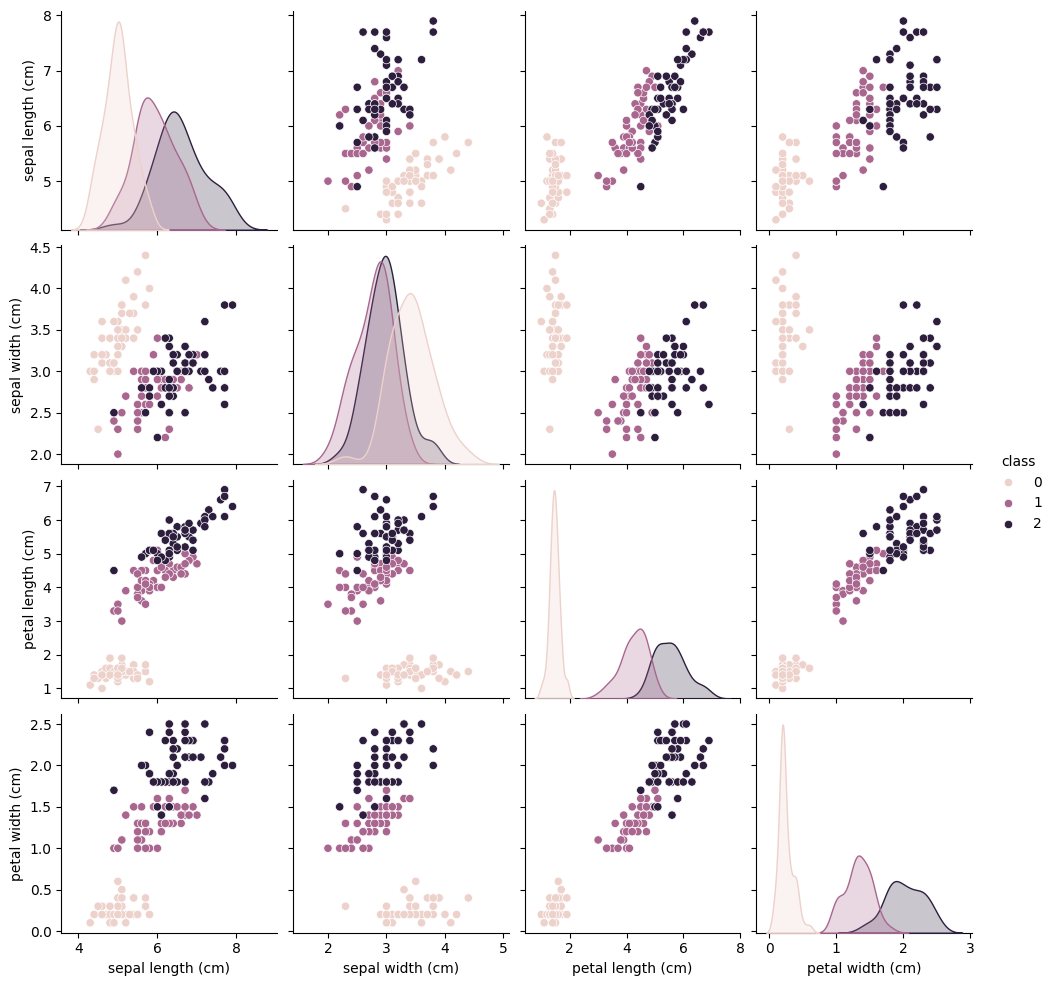

In [13]:
import seaborn as sns
import pandas as pd

# 將資料轉換成 DataFrame（假設 x 是 feature 資料）
df = pd.DataFrame(x, columns=iris.feature_names)
df["class"] = y

# 使用 pairplot
sns.pairplot(df, hue="class", diag_kind="kde")
plt.show()

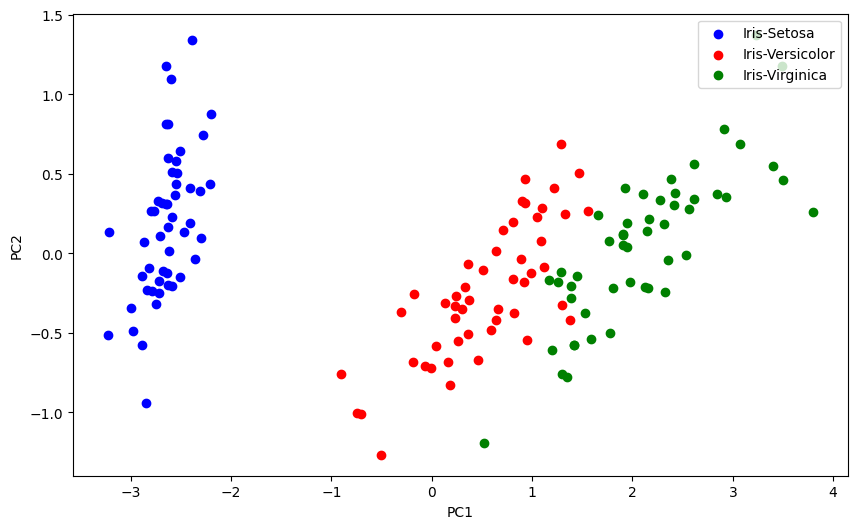

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 假設 x 是你的資料矩陣，y 是類別標籤
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

# 繪圖
plt.figure(figsize=(10, 6))
plt.scatter(x_pca[y==0, 0], x_pca[y==0, 1], color='blue', label="Iris-Setosa")
plt.scatter(x_pca[y==1, 0], x_pca[y==1, 1], color='red', label="Iris-Versicolor")
plt.scatter(x_pca[y==2, 0], x_pca[y==2, 1], color='green', label="Iris-Virginica")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(loc="upper right")
plt.show()